In [44]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load your original dataset
df_true = pd.read_csv("/content/Sample - monthly-customer-payments.csv (1).csv")

# Load your MICE imputed dataset
df_mice = pd.read_csv("/content/MICE_Sample.csv")

# Load your custom method imputed dataset
df_custom = pd.read_csv("/content/FinalImputationSample.csv")


MICE - NRMSE:
tenure            16.378198
MonthlyCharges    11.570667
TotalCharges       0.134186
dtype: float64

Custom Method - NRMSE:
tenure            14.139822
MonthlyCharges     9.989327
TotalCharges       0.115847
dtype: float64


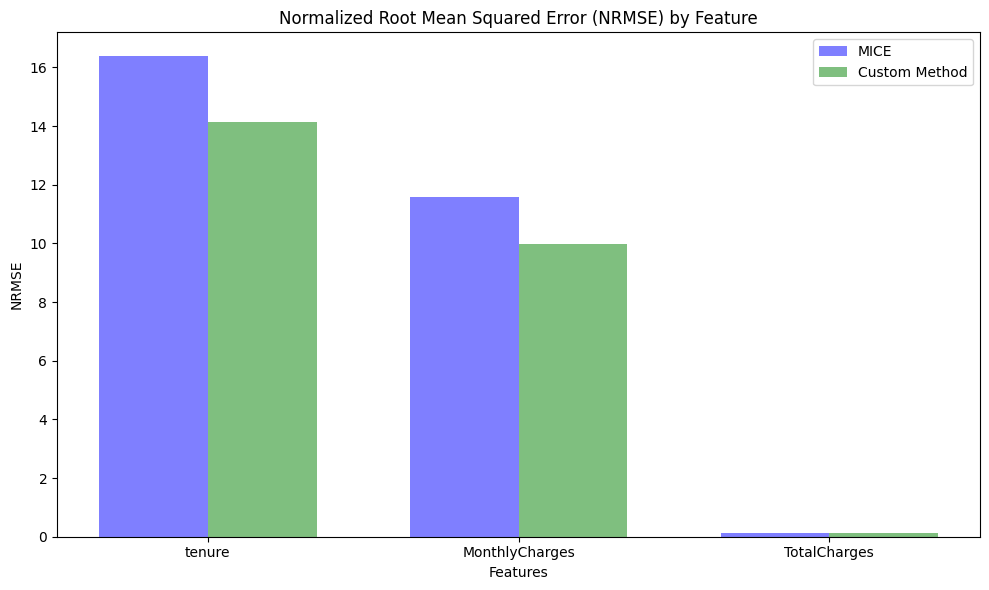

In [45]:

# Ensure that both DataFrames have the same columns
common_columns = df_true.columns.intersection(df_mice.columns)
df_true = df_true[common_columns]
df_mice = df_mice[common_columns]
df_custom = df_custom[common_columns]

# Calculate RMSE
rmse_mice = np.sqrt(mean_squared_error(df_true, df_mice))
rmse_custom = np.sqrt(mean_squared_error(df_true, df_custom))

# Calculate range of true values
range_true = df_true.max() - df_true.min()

# Calculate NRMSE for each feature
nrmse_mice = rmse_mice / range_true
nrmse_custom = rmse_custom / range_true

print("MICE - NRMSE:")
print(nrmse_mice)
print("\nCustom Method - NRMSE:")
print(nrmse_custom)

# Data visualization
plt.figure(figsize=(10, 6))

# Plot NRMSE for MICE and Custom Method for each feature
features = df_true.columns
bar_width = 0.35
index = np.arange(len(features))

plt.bar(index, nrmse_mice, bar_width, label='MICE', color='blue', alpha=0.5)
plt.bar(index + bar_width, nrmse_custom, bar_width, label='Custom Method', color='green', alpha=0.5)

plt.xlabel('Features')
plt.ylabel('NRMSE')
plt.title('Normalized Root Mean Squared Error (NRMSE) by Feature')
plt.xticks(index + bar_width / 2, features)
plt.legend()
plt.tight_layout()
plt.show()


MICE - RMSE: 1162.8520411143659
Custom Method - RMSE: 1003.927382162314


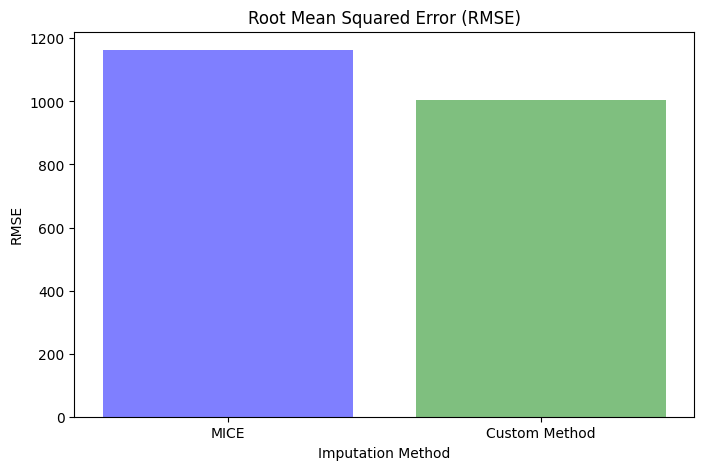

In [46]:
#Calculate RMSE
rmse_mice = np.sqrt(mean_squared_error(df_true, df_mice))
rmse_custom = np.sqrt(mean_squared_error(df_true, df_custom))

print("MICE - RMSE:", rmse_mice)
print("Custom Method - RMSE:", rmse_custom)

# Data visualization
plt.figure(figsize=(8, 5))

# Plot RMSE for MICE and Custom Method
plt.bar(['MICE', 'Custom Method'], [rmse_mice, rmse_custom], color=['blue', 'green'], alpha=0.5)
plt.xlabel('Imputation Method')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.show()


MICE - NRMSE: 0.11595654792716469
Custom Method - NRMSE: 0.1001089986623289


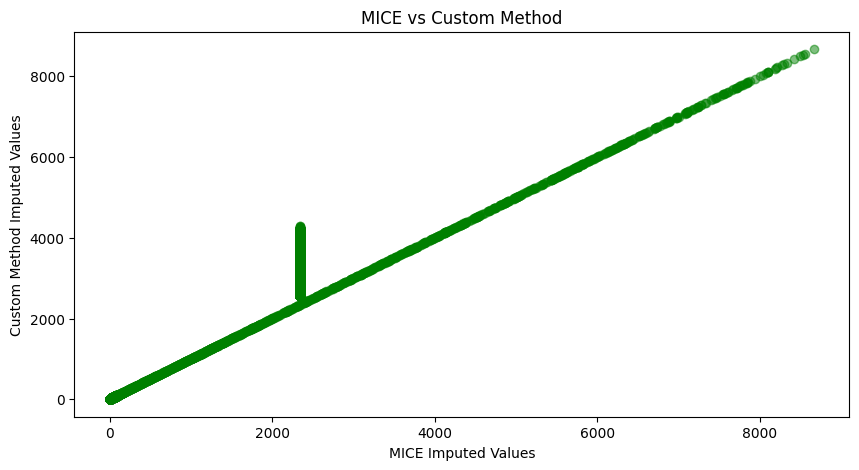

In [18]:
nrmse_mice = normalized_rmse(df_true, df_mice)

# Calculate NRMSE for your custom method
nrmse_custom = normalized_rmse(df_true, df_custom)

print("MICE - NRMSE:", nrmse_mice)
print("Custom Method - NRMSE:", nrmse_custom)

# Data visualization
plt.figure(figsize=(10, 5))

# Plot 1: MICE vs Custom Method
plt.scatter(df_mice, df_custom, color='green', alpha=0.5)
plt.xlabel('MICE Imputed Values')
plt.ylabel('Custom Method Imputed Values')
plt.title('MICE vs Custom Method')

plt.show()